# Seaborn
- Seaborn은 matplotlib의 상위 호환 데이터 시각화를 위한 라이브러리
- Seaborn 패키지는 data frame으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공
- Matplotlib에는 없고, seaborn에서만 제공되는 통계 차트 위주로 작성할 것

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

## Setup
- Style의 종류: darkgrid, whitegrid, dark, white, ticks
- Palette의 종류: https://seaborn.pydata.org/tutorial/color_palettes.html

In [2]:
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

# 배경을 darkgrid 로 설정
sns.set_style("darkgrid")

# Palette를 Set3 로 설정
sns.set_palette('Set2')

## 사용할 데이터에 대해 알아보기

In [3]:
tips = sns.load_dataset('tips')

print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


- total_bill: 총 합계 요금표
- tip: 팁 금액
- sex: 성별
- smoker: 흡연자 여부
- day: 요일
- time: 식사 시간
- size: 식사 인원

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


# 1-D data

## Countplot

- 항목별 갯수를 세어줌
- 알아서 해당 column을 구성하고 있는 value들을 구분하여 보여줌

### 세로로 그리기

**Example 1**

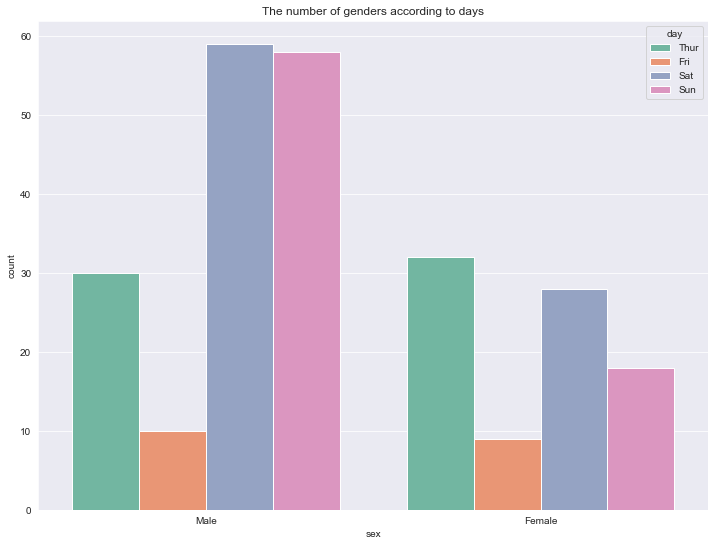

In [6]:
ax = sns.countplot(x="sex", hue="day", data=tips)
ax.set_title('The number of genders according to days')
plt.show()

**Example 2**

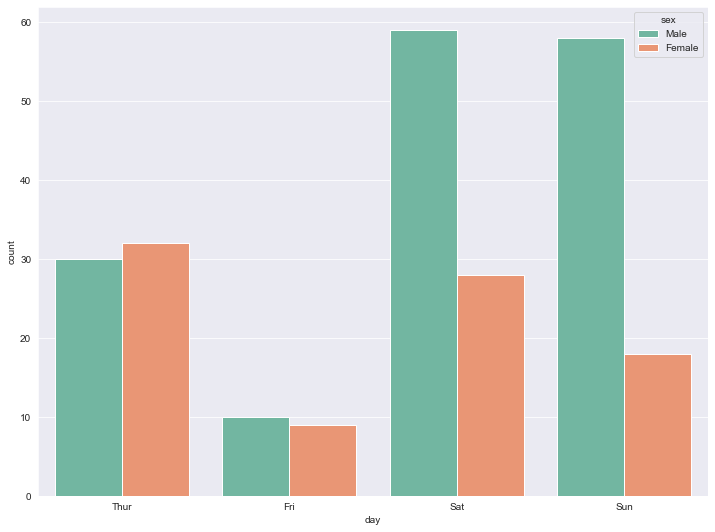

In [7]:
sns.countplot(x="day", hue="sex", data=tips)
plt.show()

### 가로로 그리기

**Example 1**

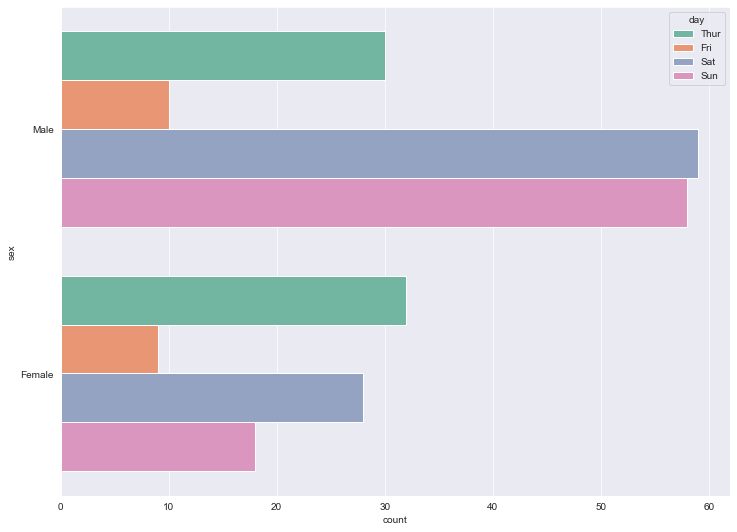

In [8]:
sns.countplot(y="sex", hue="day", data=tips)
plt.show()

**Example 2**

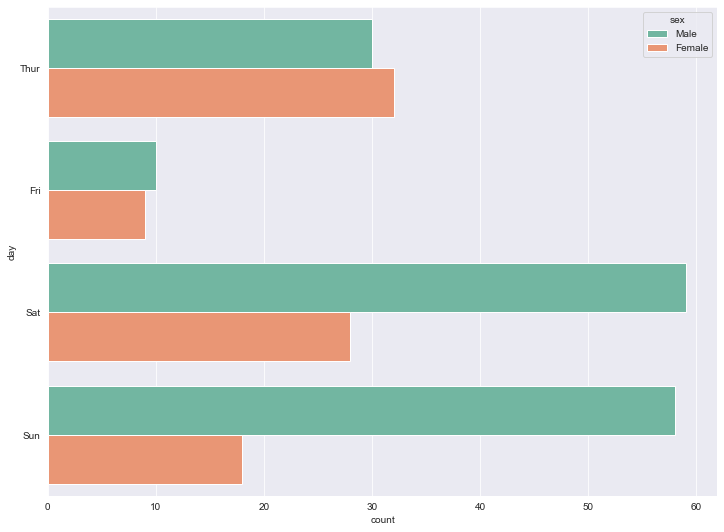

In [9]:
sns.countplot(y="day", hue="sex", data=tips)
plt.show()

### 다른 색상 팔레트 설정

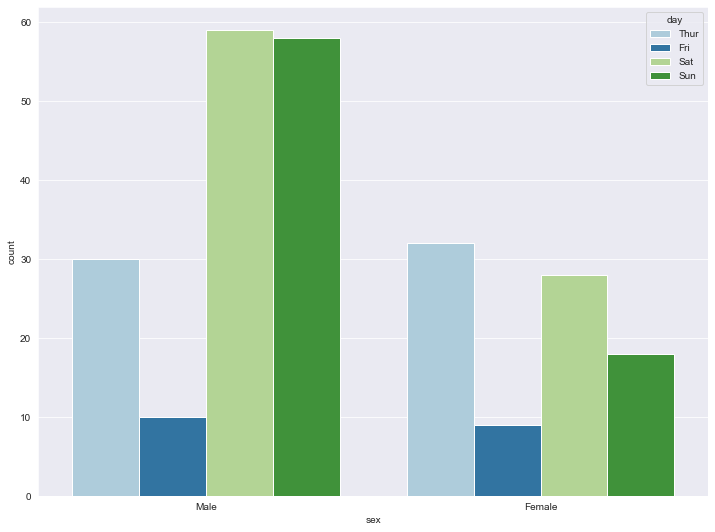

In [10]:
sns.countplot(x="sex", hue="day", palette='Paired', data=tips)
plt.show()

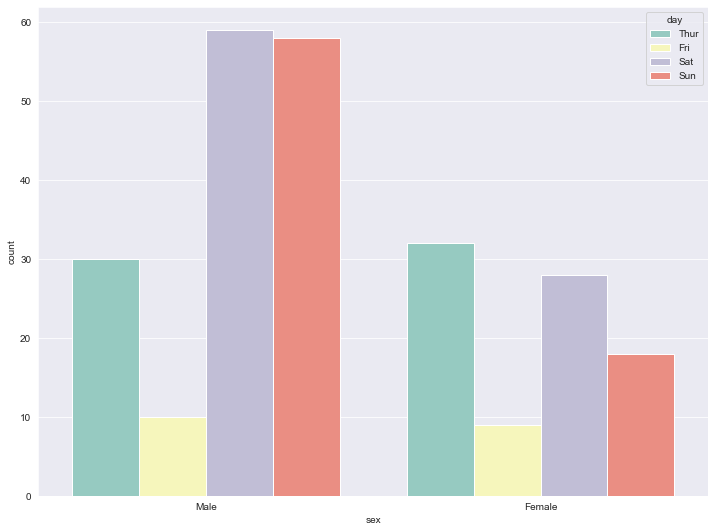

In [11]:
sns.countplot(x="sex", hue="day", palette='Set3', data=tips)
plt.show()

## Distplot

- Matplotlib의 hist 그래프와 kdeplot을 통합한 그래프
- 분포와 밀도를 확인할 수 있음

### 기본 distplot 그리기

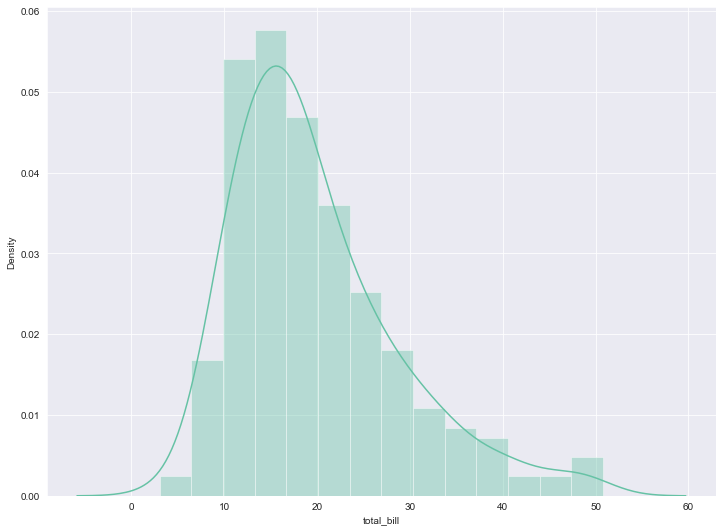

In [12]:
sns.distplot(tips["total_bill"])
plt.show()

### Rugplot
- 데이터 위치를 x축 위에 작은 선분 (rug)으로 나타내어 데이터들의 위치 및 분포를 보여줌

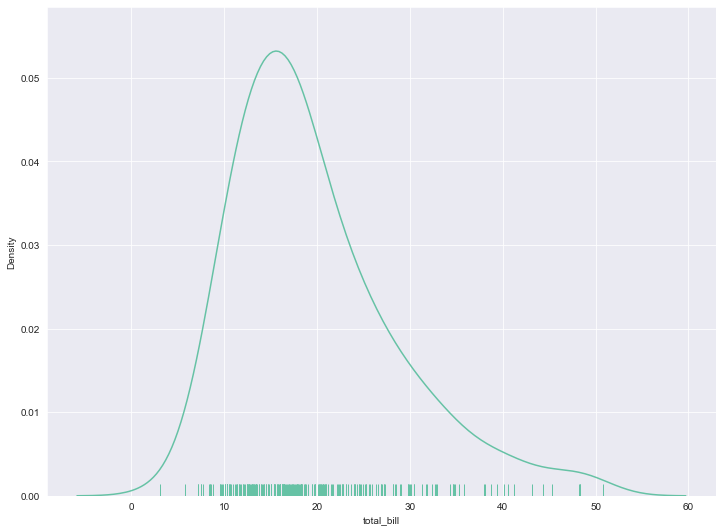

In [13]:
sns.distplot(tips["total_bill"], rug=True, hist=False)
plt.show()

### Kernel Density Estimation (KDE)
- kde는 histogram보다 부드러운 형태의 분포 곡선을 보여주는 방법
- Kernel density function은 기본적으로 Gaussian kernel을 사용

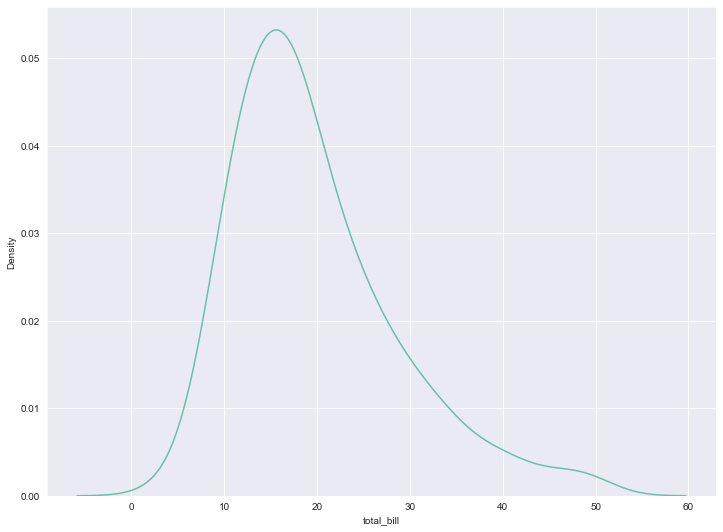

In [14]:
sns.distplot(tips["total_bill"], rug=False, hist=False, kde=True)
plt.show()

### 비교

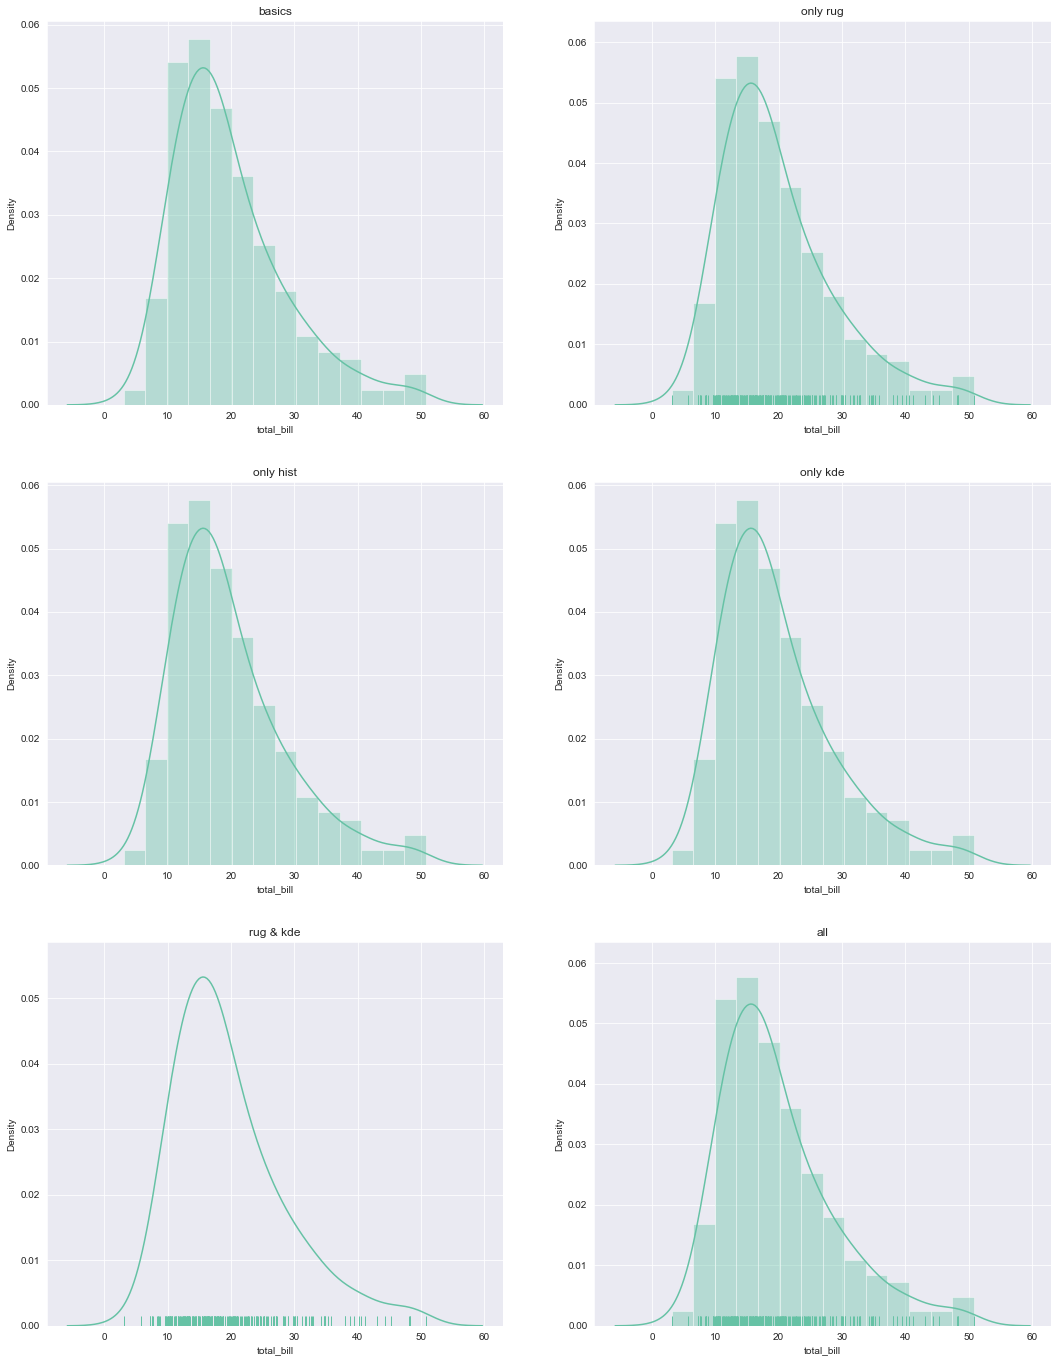

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 24))
x = tips["total_bill"]

sns.distplot(a=x, ax=ax[0][0]).set_title("basics")
sns.distplot(a=x, ax=ax[0][1], rug=True).set_title("only rug")
sns.distplot(a=x, ax=ax[1][0], hist=True).set_title("only hist")
sns.distplot(a=x, ax=ax[1][1], kde=True).set_title("only kde")
sns.distplot(a=x, ax=ax[2][0], rug=True, hist=False,
             kde=True).set_title("rug & kde")
sns.distplot(a=x, ax=ax[2][1], rug=True, hist=True, kde=True).set_title("all")
plt.show()

### 가로로 그리기

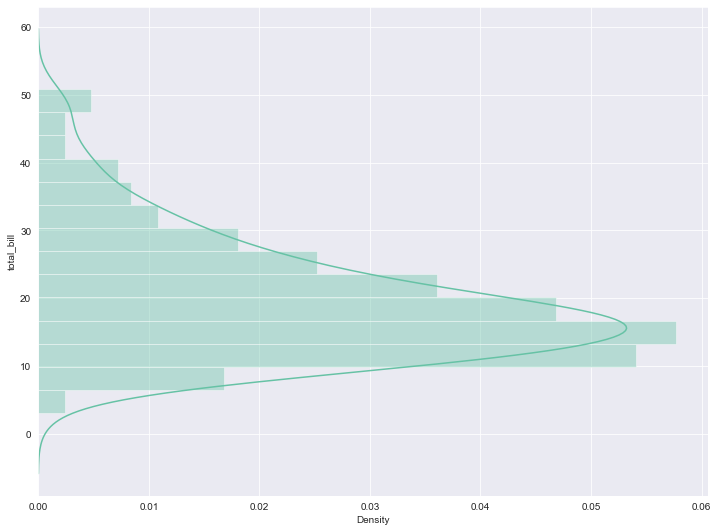

In [16]:
sns.distplot(tips["total_bill"], vertical=True)
plt.show()

### 컬러 바꾸기

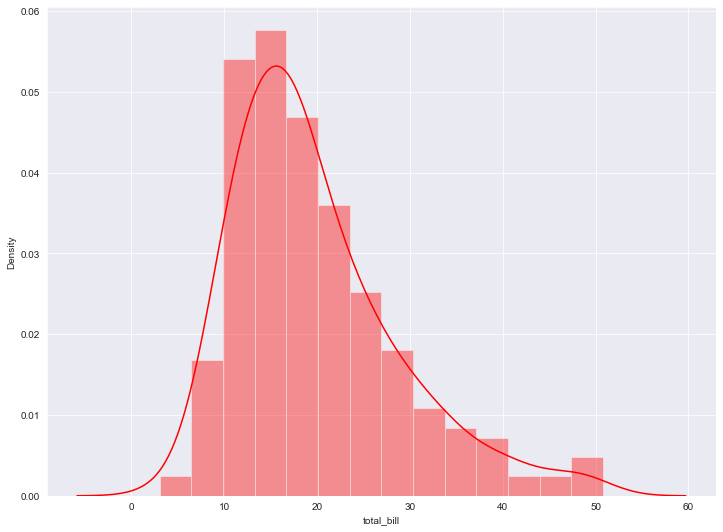

In [17]:
sns.distplot(tips["total_bill"], color="r")
plt.show()

# 2-D categorical data

## Heatmap
- 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열 분포 형태의 비쥬얼한 그래픽으로 출력

### 기본 heatmap 그리기

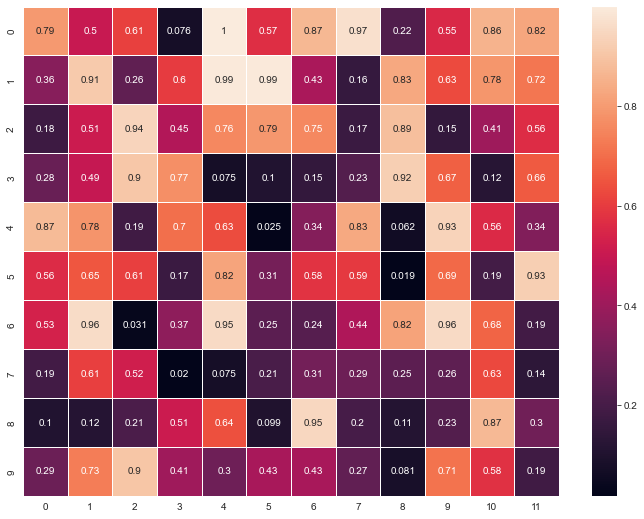

In [18]:
uniform_data = np.random.rand(10, 12)
sns.heatmap(data=uniform_data, annot=True, linewidths=1)
plt.show()

### Pivot table을 활용하여 그리기
- Pivot table이란? 
  - 데이터 처리의 한 기법
  - 커다란 표의 데이터를 요약하는 통계표
  - 이 요약에는 합계, 평균, 기타 통계가 포함될 수 있음
  - 유용한 정보에 집중할 수 있도록 하기 위해 통계를 정렬 또는 재정렬

In [19]:
pivot = tips.pivot_table(index='day', columns='size', aggfunc='size')
print(pivot)

size  1   2   3   4  5  6
day                      
Thur  1  48   4   5  1  3
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1


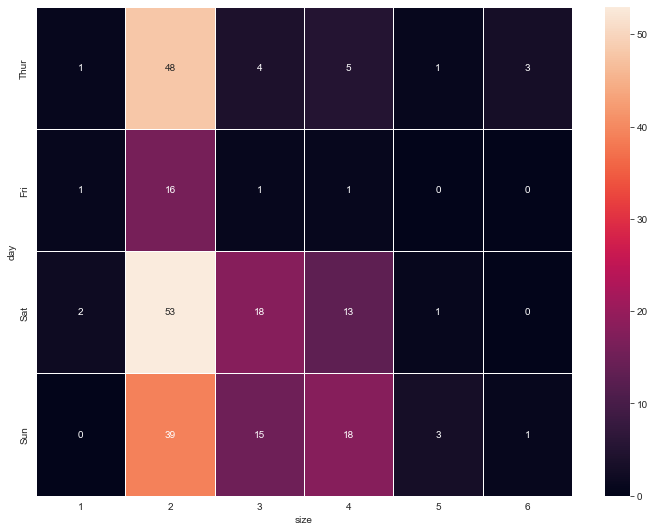

In [20]:
sns.heatmap(pivot, annot=True, linewidths=1)
plt.show()

### Correlation 시각화
- corr() 함술르 통해 데이터의 상관관계를 보여줌

In [21]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


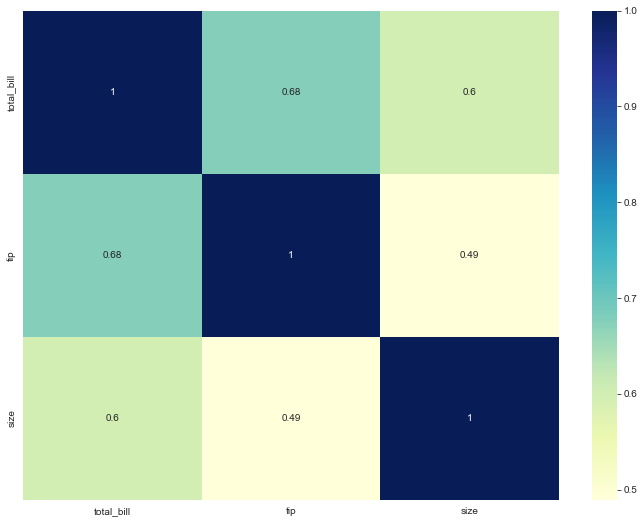

In [22]:
sns.heatmap(tips.corr(), annot=True, cmap="YlGnBu")
plt.show()

# 2-D continuous data

## Scatterplot
- Matplotlib에 있는 scatter와 동일

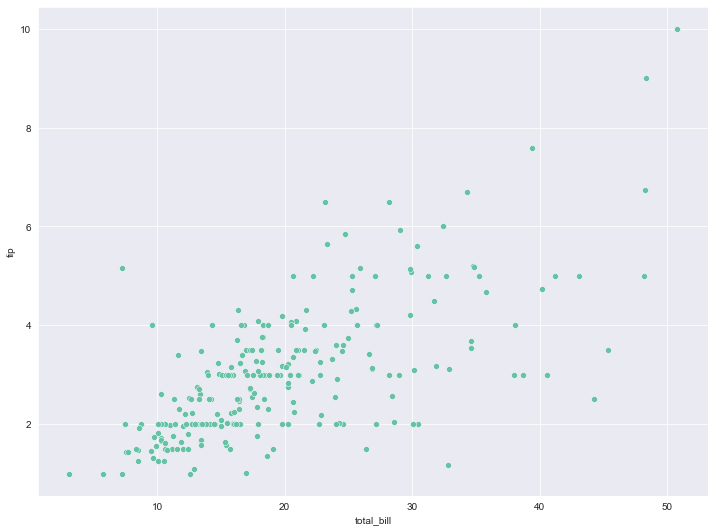

In [23]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

## Jointplot
- scatter와 histogram을 동시에 그려줌
- 숫자형 데이터만 표현 가능

### 기본 jointplot 그리기

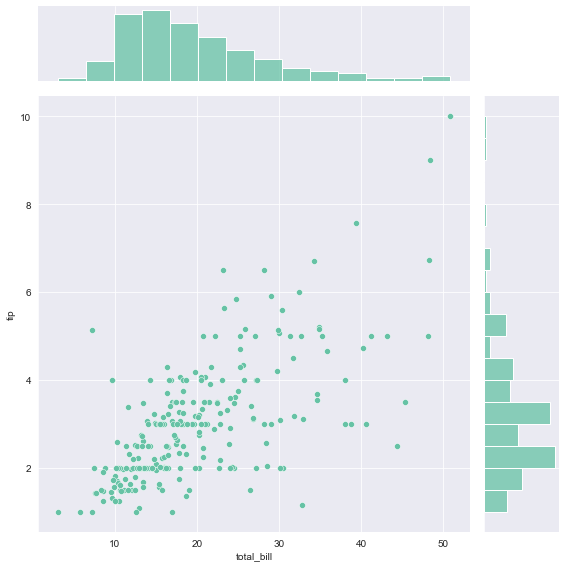

In [24]:
sns.jointplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()

### 선형관계를 표현하는 regression 라인 그리기
- kind='reg' 추가

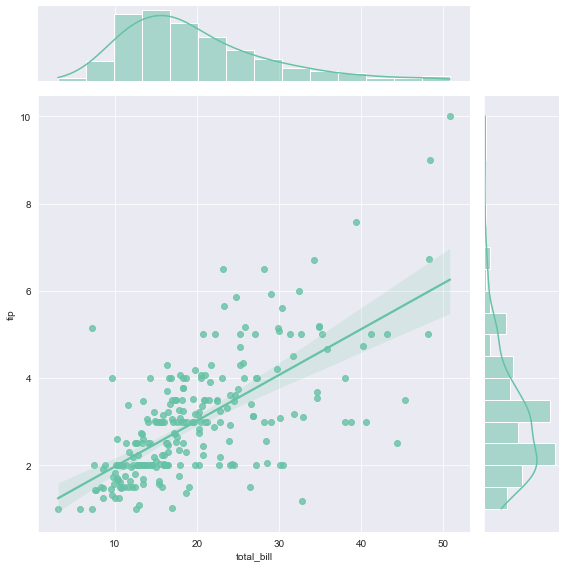

In [25]:
sns.jointplot(x="total_bill", y="tip", height=8, data=tips, kind="reg")
plt.show()

### Hex 밀도 보기
- kind='hex' 추가

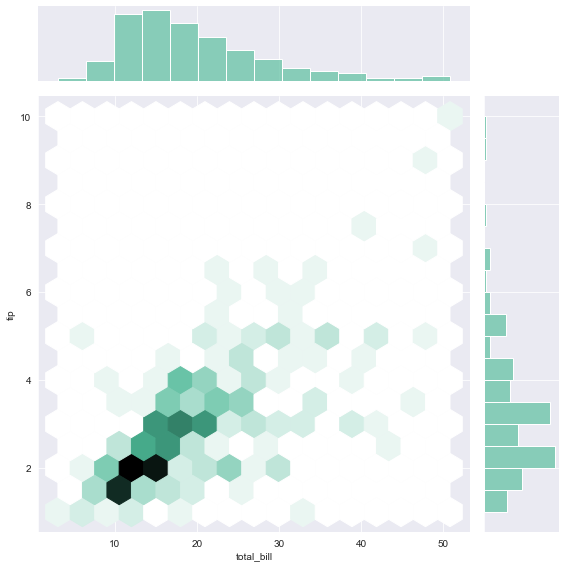

In [26]:
sns.jointplot(x="total_bill", y="tip", height=8, data=tips, kind="hex")
plt.show()

### KDE 밀집도 확인하기
- kind='kde' 추가

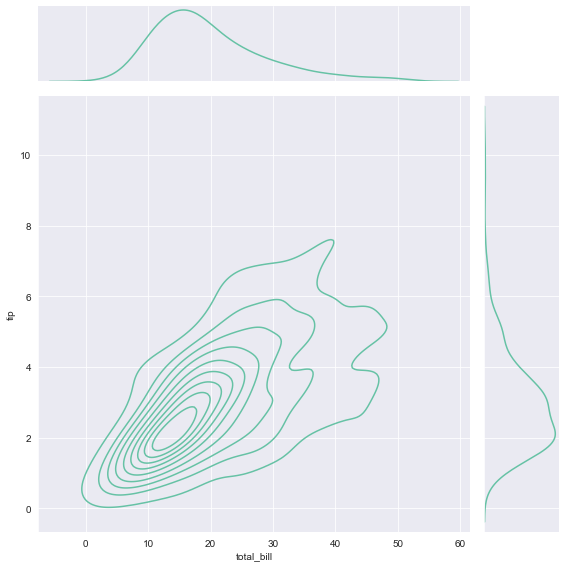

In [27]:
sns.jointplot(x="total_bill", y="tip", height=8, data=tips, kind="kde")
plt.show()

# 2-D continuous & categorical data

## Barplot
- 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성
- 평균은 막대의 높이로, 편차는 error bar로 표시

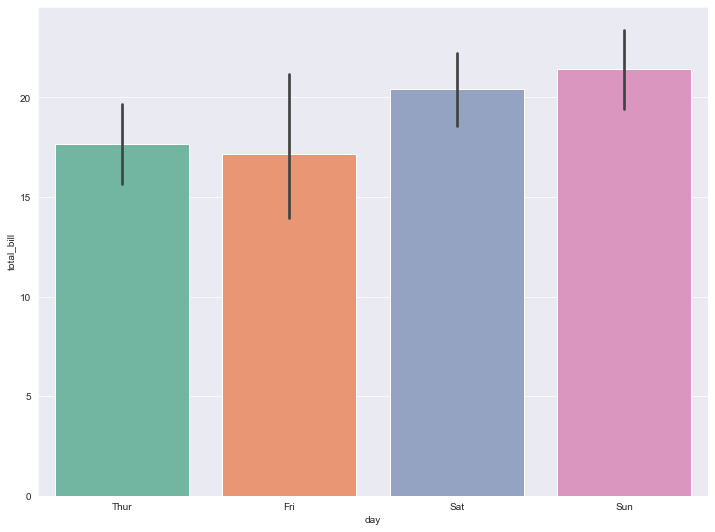

In [28]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

## Boxplot
- Box와 box 바깥의 선 (whisker)으로 이루어짐
- Box는 실수 값 분포에서 1사분위수 (Q1)와 3사분위수 (Q3)를 뜻하고, 3사분위수와 1사분수의 차이 (Q3 - Q1)를 interquartile range (IQR)라고 함
- 박스 내부의 가로선은 중앙값을 나타냄
- 박스 외부의 세로선은 1사분위수보다 1.5 * IQR 만큼 낮은 값과 3사분위수보다 1.5 * IQR 만큼 높은 값의 구간을 기준으로, 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분
- 그 바깥의 점은 outlier이고, 일일히 점으로 표시
- 중앙값, 표준 편차 등 분포의 간략한 특성만 보여줌

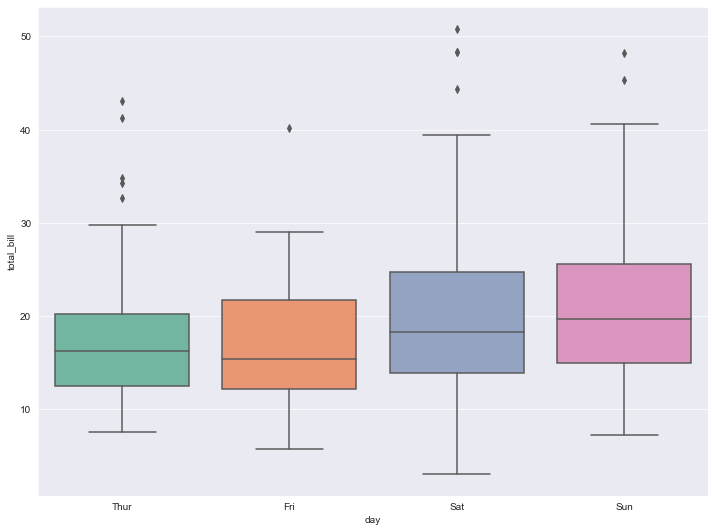

In [29]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

## Pointplot
- 점 추정치 및 신뢰구간을 표시

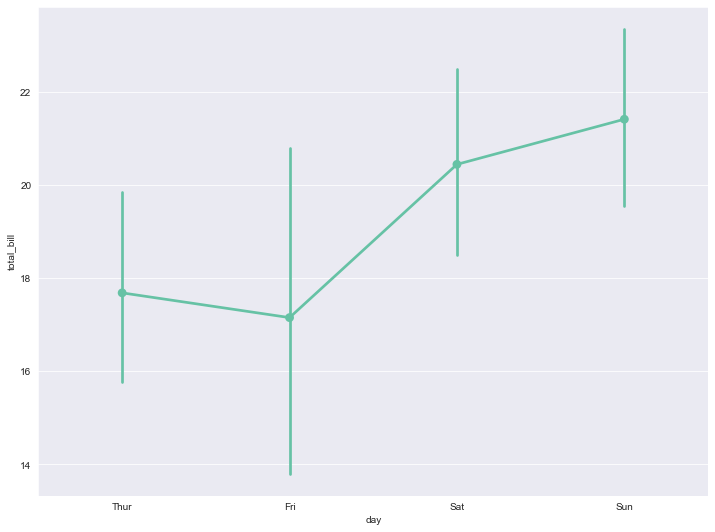

In [30]:
sns.pointplot(x="day", y="total_bill", data=tips)
plt.show()

## Violinplot
- 바이올린처럼 생긴 violinplot
- column에 대한 데이터의 비교 분포도
  - 뚱뚱한 부분: 데이터의 분포
  - 양쪽 끝 뾰족한 부분: 데이터의 최소값과 최대값

### 기본 violinplot 그리기

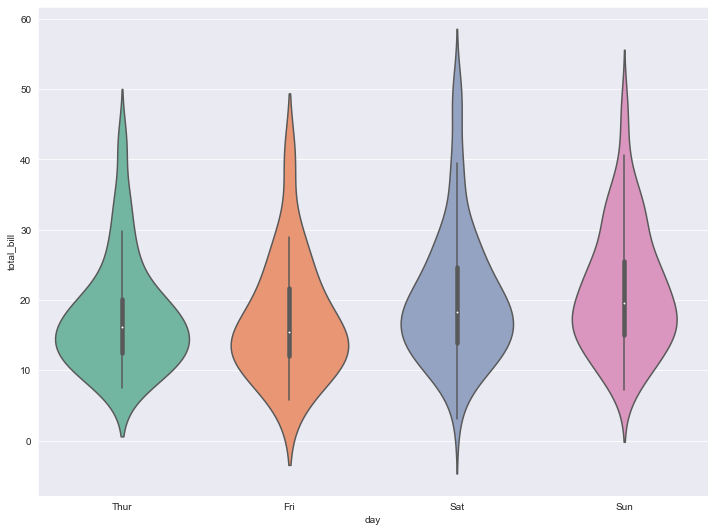

In [31]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

### 가로로 그리기

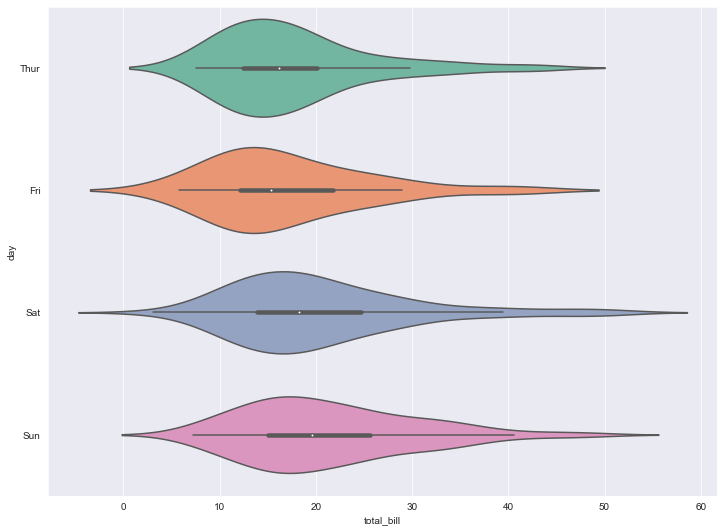

In [32]:
sns.violinplot(x="total_bill", y="day", data=tips)
plt.show()

## Stripplot
- 마치 scatterplot처럼 모든 데이터를 점으로 그려줌
- jitter=True를 설정하면 가로축의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 함

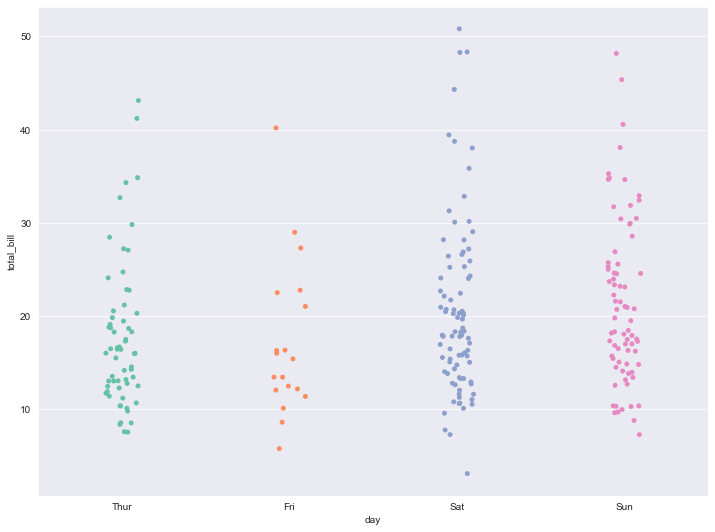

In [33]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.show()

## Swarmplot
- stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동

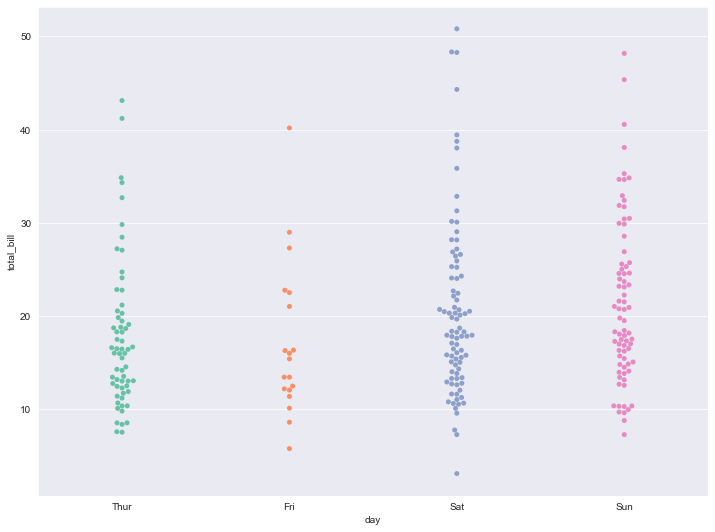

In [34]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.show()

# N-D categorical data (N > 2)

## Heatmap
- 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음

In [35]:
pivot = tips.pivot_table(index='day',
                         columns='size',
                         values='tip',
                         aggfunc='mean')
print(pivot)

size     1         2         3         4         5    6
day                                                    
Thur  1.83  2.442500  2.692500  4.218000  5.000000  5.3
Fri   1.92  2.644375  3.000000  4.730000       NaN  NaN
Sat   1.00  2.517547  3.797778  4.123846  3.000000  NaN
Sun    NaN  2.816923  3.120667  4.087778  4.046667  5.0


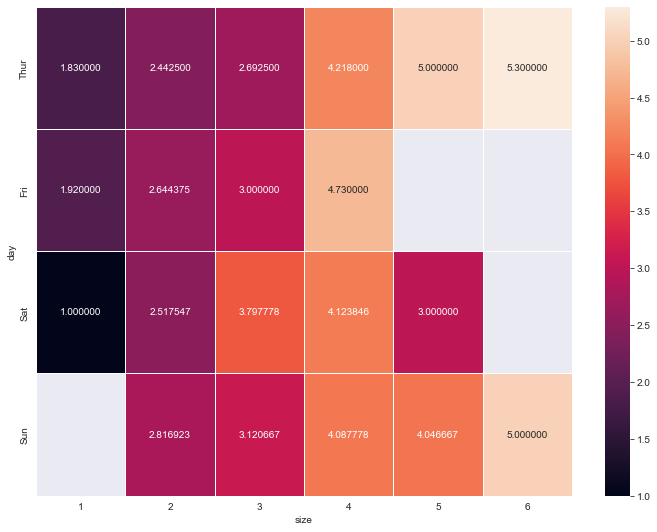

In [36]:
sns.heatmap(pivot, annot=True, fmt='f', linewidths=1)
plt.show()

## Catplot
- hue와 row, col 등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 표현

### 기본 catplot 그리기

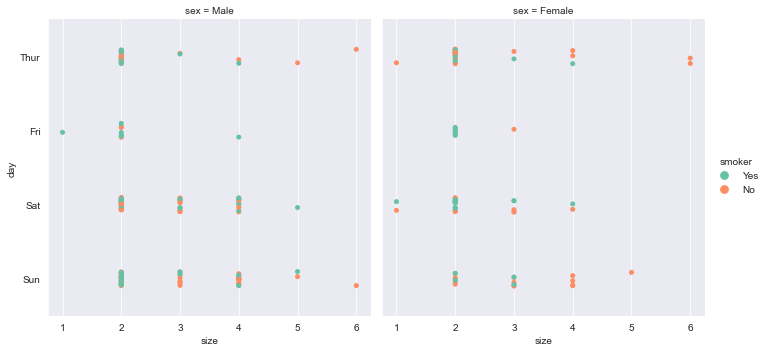

In [37]:
sns.catplot(x="size", y="day", hue="smoker", col="sex", data=tips)
plt.show()

### Split으로 구분하기

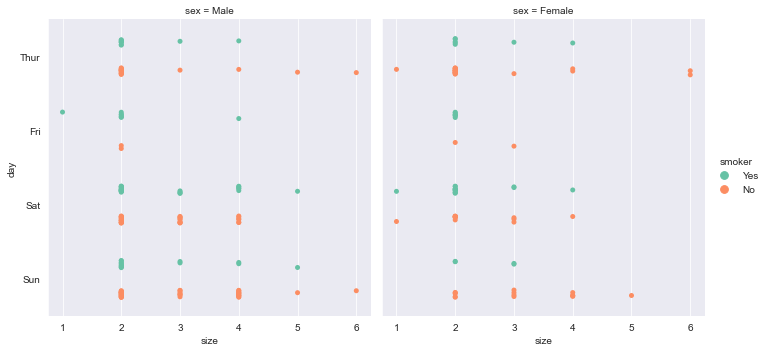

In [38]:
sns.catplot(x="size", y="day", hue="smoker", col="sex", data=tips, split=True)
plt.show()

### Aspect를 이용하여 row를 넓게하여 그리기
- 각 면의 가로, 세로 비율 설정
- aspect * height가 각 면의 너비를 인치 단위로 제공

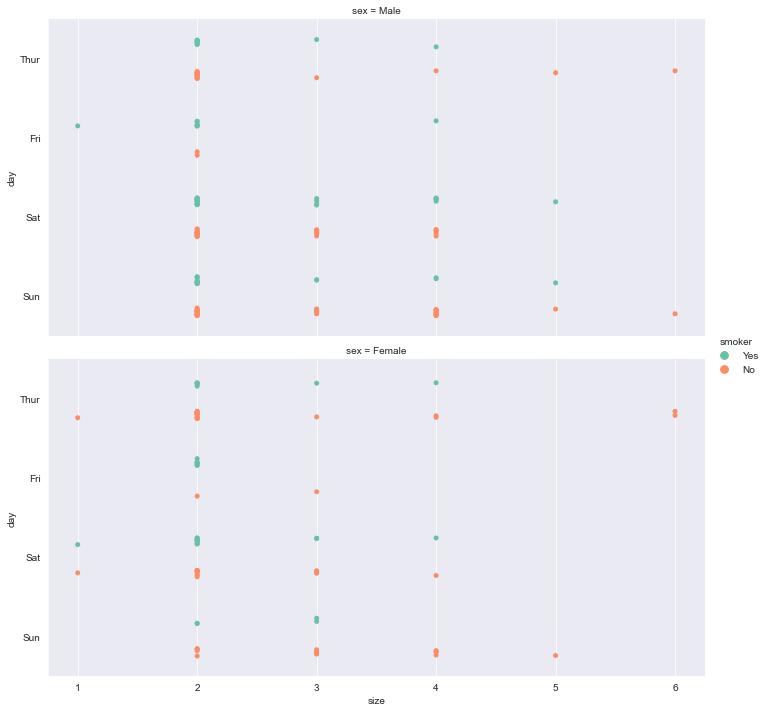

In [39]:
sns.catplot(x="size",
            y="day",
            hue="smoker",
            row="sex",
            data=tips,
            split=True,
            aspect=2)
plt.show()

### Kind 옵션으로 다양하게 그리기
- kind로 strip(기본값), swarm, box, violin, point, bar, count 가능

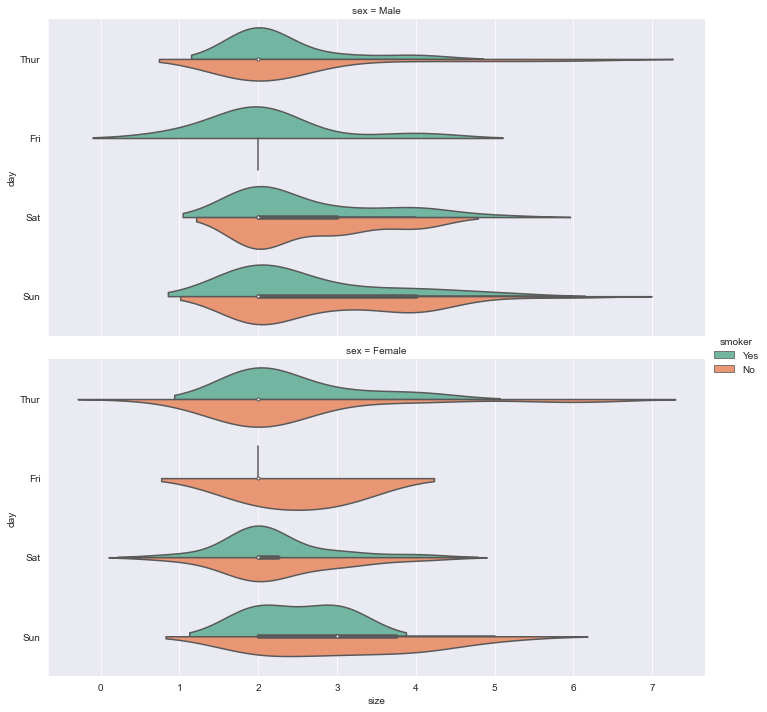

In [40]:
sns.catplot(x="size",
            y="day",
            hue="smoker",
            row="sex",
            data=tips,
            split=True,
            aspect=2,
            kind="violin")
plt.show()

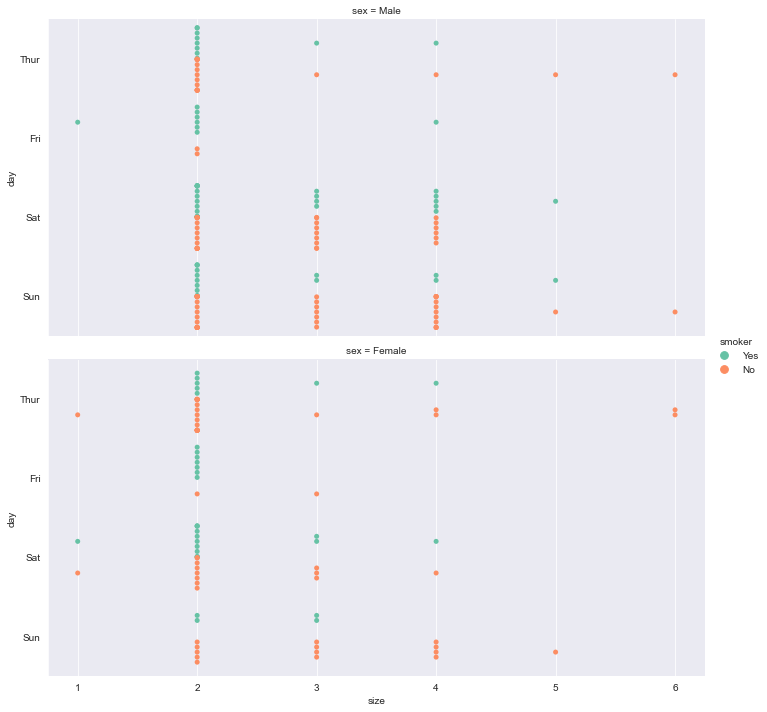

In [41]:
sns.catplot(x="size", y="day", hue="smoker", row="sex", data=tips, 
            split=True, aspect=2, kind="swarm")
plt.show()

# N-D continuous data

## Pairplot
- pairplot은 grid 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그려줌
- 숫자형 column에 대해서만 그려줌

### 기본 pairplot 그리기

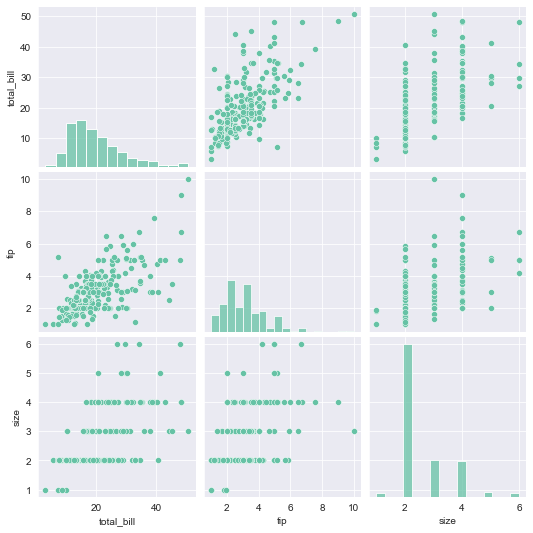

In [42]:
sns.pairplot(tips)
plt.show()

### Hue 옵션으로 특성 구분하기

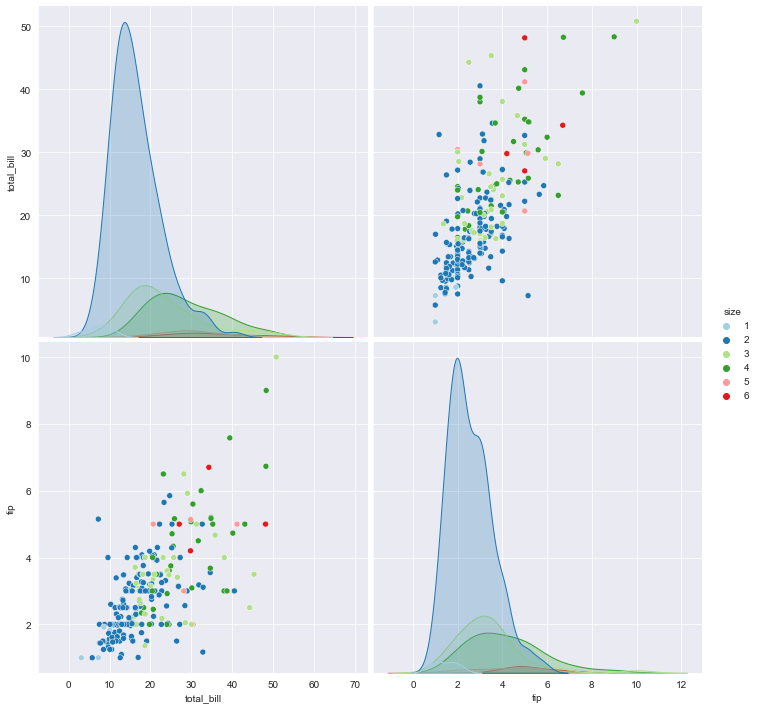

In [43]:
sns.pairplot(tips, hue='size', palette="Paired", height=5)
plt.show()

## PairGrid
- pairplot보다 더 좋음

### 기본 PairGrid 그리기

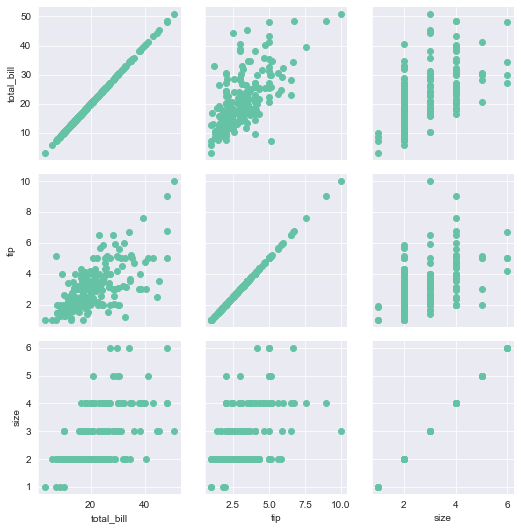

In [44]:
g = sns.PairGrid(tips)
g.map(plt.scatter)
plt.show()

### 대각선을 기준으로 위, 아래에 대해 각각 그리기

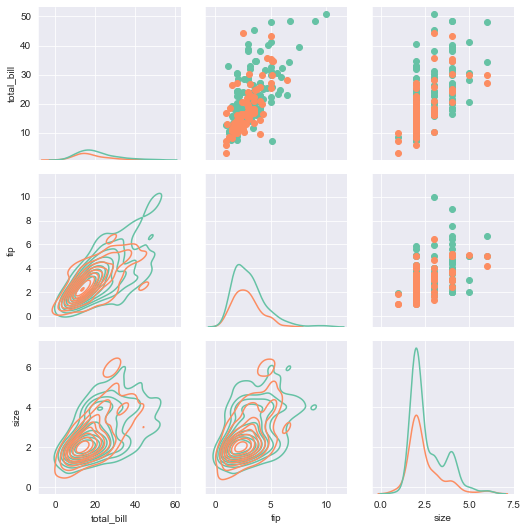

In [45]:
g = sns.PairGrid(tips, hue='sex')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, shadow=True)
plt.show()

# N-D continuous & categorical data

- hue를 이용하여 2-D continuous & categorical data에서 사용했던 방법들을 사용할 수 있음
    - barplot
    - boxplot
    - pointplot
    - violinplot
    - stripplot
    - swarmplot

## Violinplot

### Hue 옵션으로 분포 비교
- 실제로 hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 비교 분포의 큰 의미가 없음

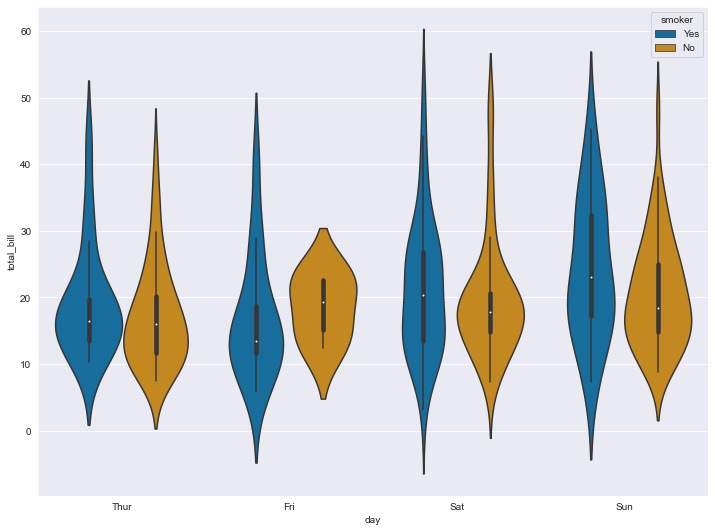

In [46]:
sns.violinplot(x="day",
               y="total_bill",
               hue="smoker",
               data=tips,
               palette="colorblind")
plt.show()

### Split으로 합쳐서 그리기

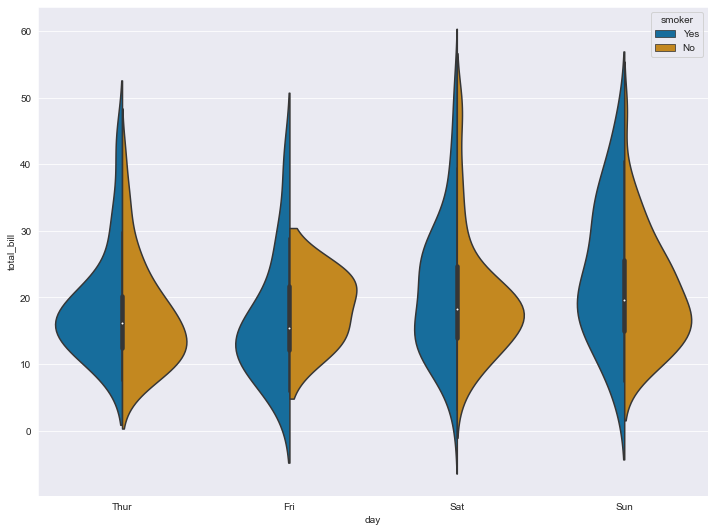

In [47]:
sns.violinplot(x="day",
               y="total_bill",
               hue="smoker",
               data=tips,
               palette="colorblind",
               split=True)
plt.show()

## LMplort
- lmplot은 column 간의 correlation 관계를 확인하기에 용이한 차트
- outlier도 같이 짐작해 볼 수 있음

### 기본 lmplot 그리기

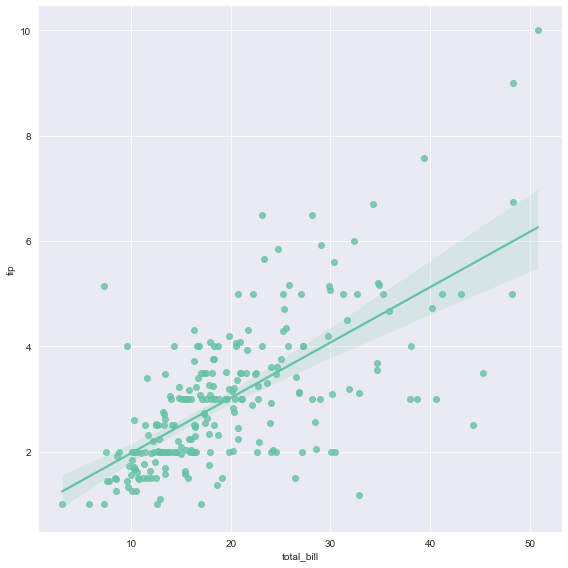

In [48]:
sns.lmplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()

### Hue 옵션으로 다중 선형관계 그리기
- 아래의 그래프를 통하여 비흡연자가, 흡연자 대비 좀 더 가파른 선형관계를 가지는 것을 볼 수 있음

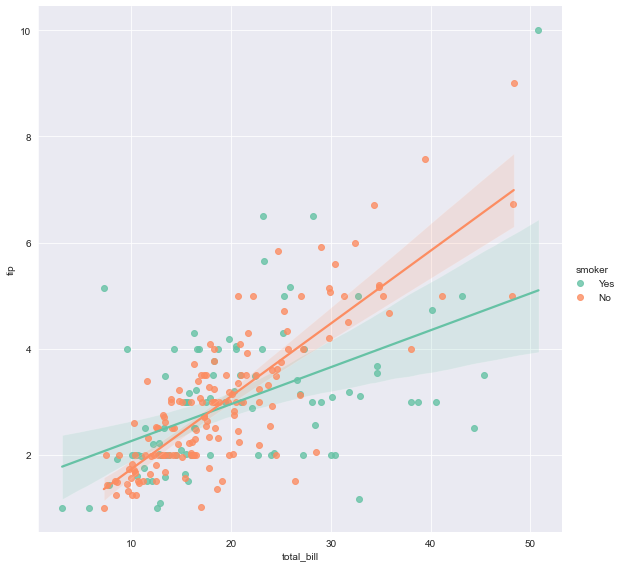

In [49]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", height=8, data=tips)
plt.show()

### Col 옵션을 추가하여 그래프를 여러개 그리기
- col로 나눠서 그릴 column 정하기
- col_wrap으로 한 줄에 표기할 column의 개수를 명시

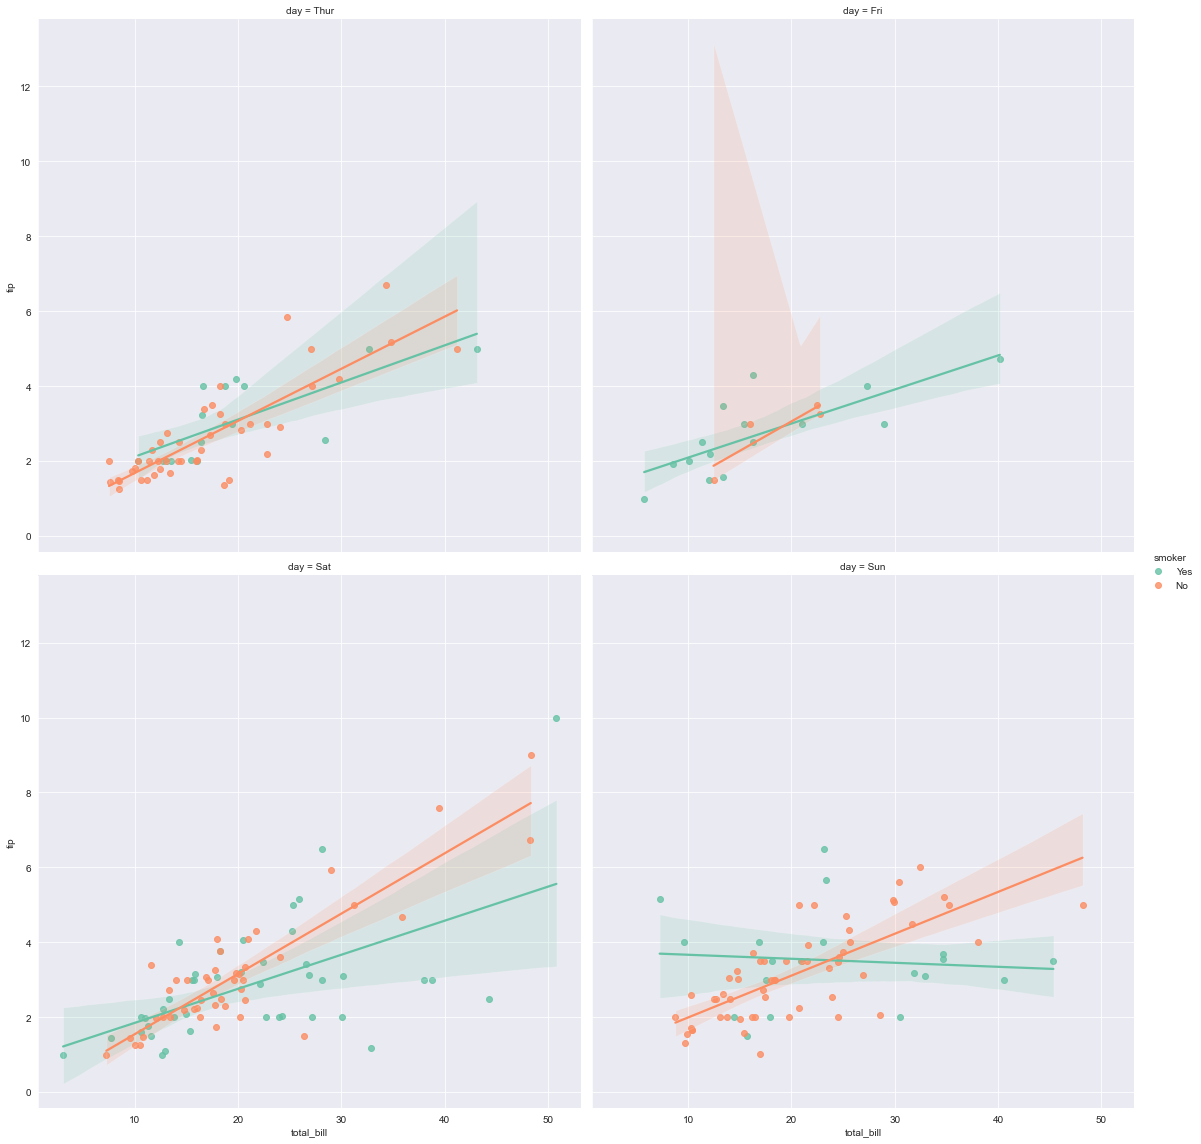

In [50]:
sns.lmplot(x='total_bill',
           y='tip',
           hue='smoker',
           col='day',
           col_wrap=2,
           height=8,
           data=tips)
plt.show()

## Relplot
- 두 column간 상관관계를 보지만 lmplot처럼 선형관계를 따로 그려주지는 않음

### 기본 relplot 그리기

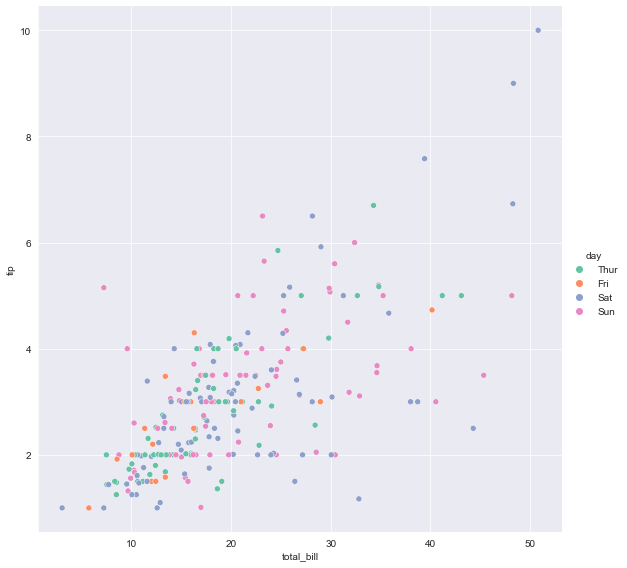

In [51]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips, height=8)
plt.show()

### Col 옵션으로 그래프 분할

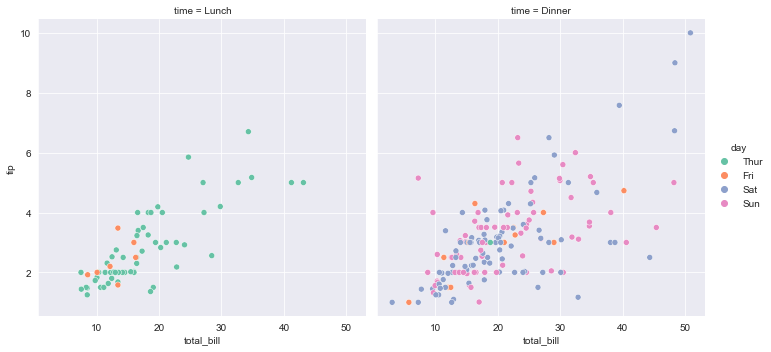

In [52]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips)
plt.show()

### Row와 column에 표기할 데이터 column 선택

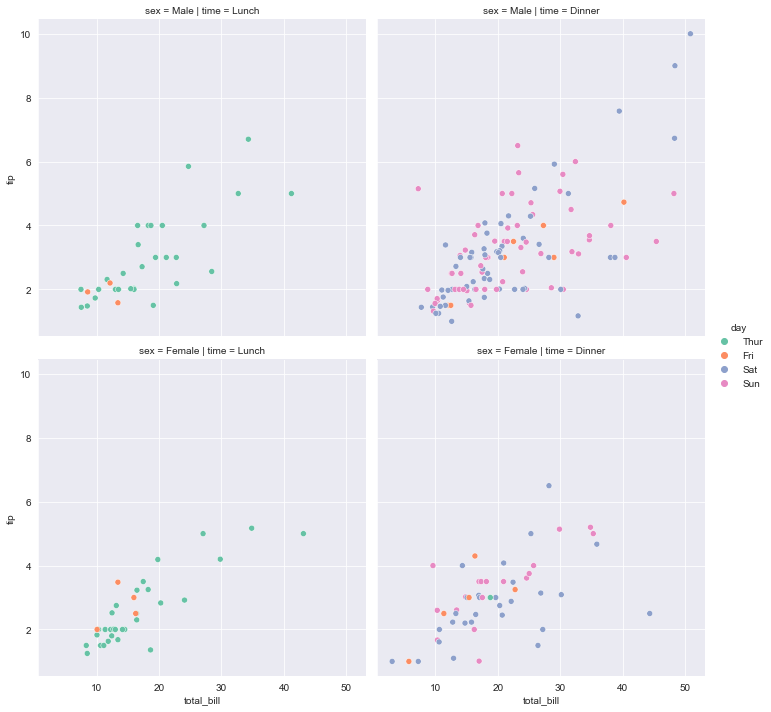

In [53]:
sns.relplot(x="total_bill",
            y="tip",
            hue="day",
            row="sex",
            col="time",
            data=tips)
plt.show()

### 컬러 팔레트 적용

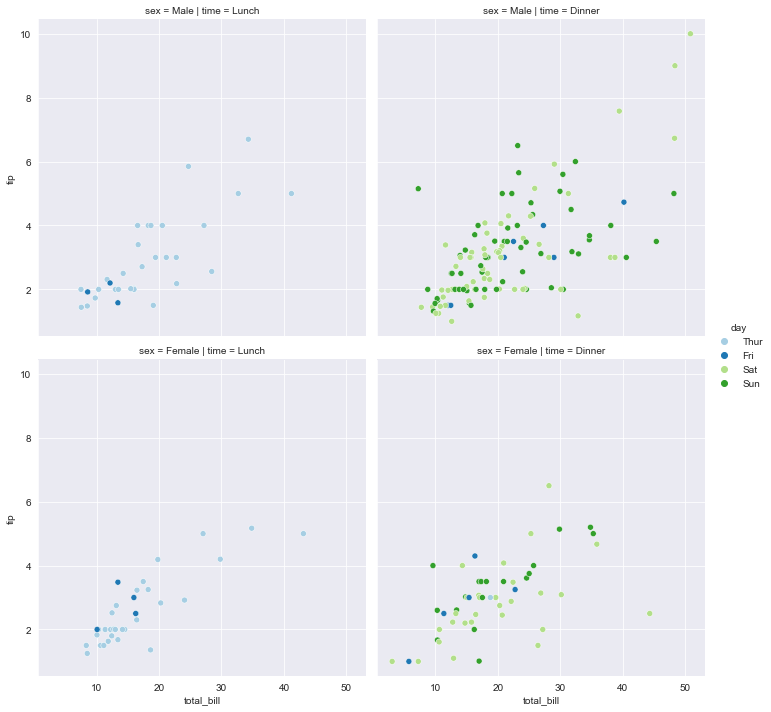

In [54]:
sns.relplot(x="total_bill",
            y="tip",
            hue="day",
            row="sex",
            col="time",
            palette='Paired',
            data=tips)
plt.show()

## mplot3d
- Matplotlib에서 3D 그래프를 그려주는 라이브러리
- 커맨드 방식인 Pyplot API는 없고, 항상 객체지향 API를 사용해야 함

<IPython.core.display.Javascript object>


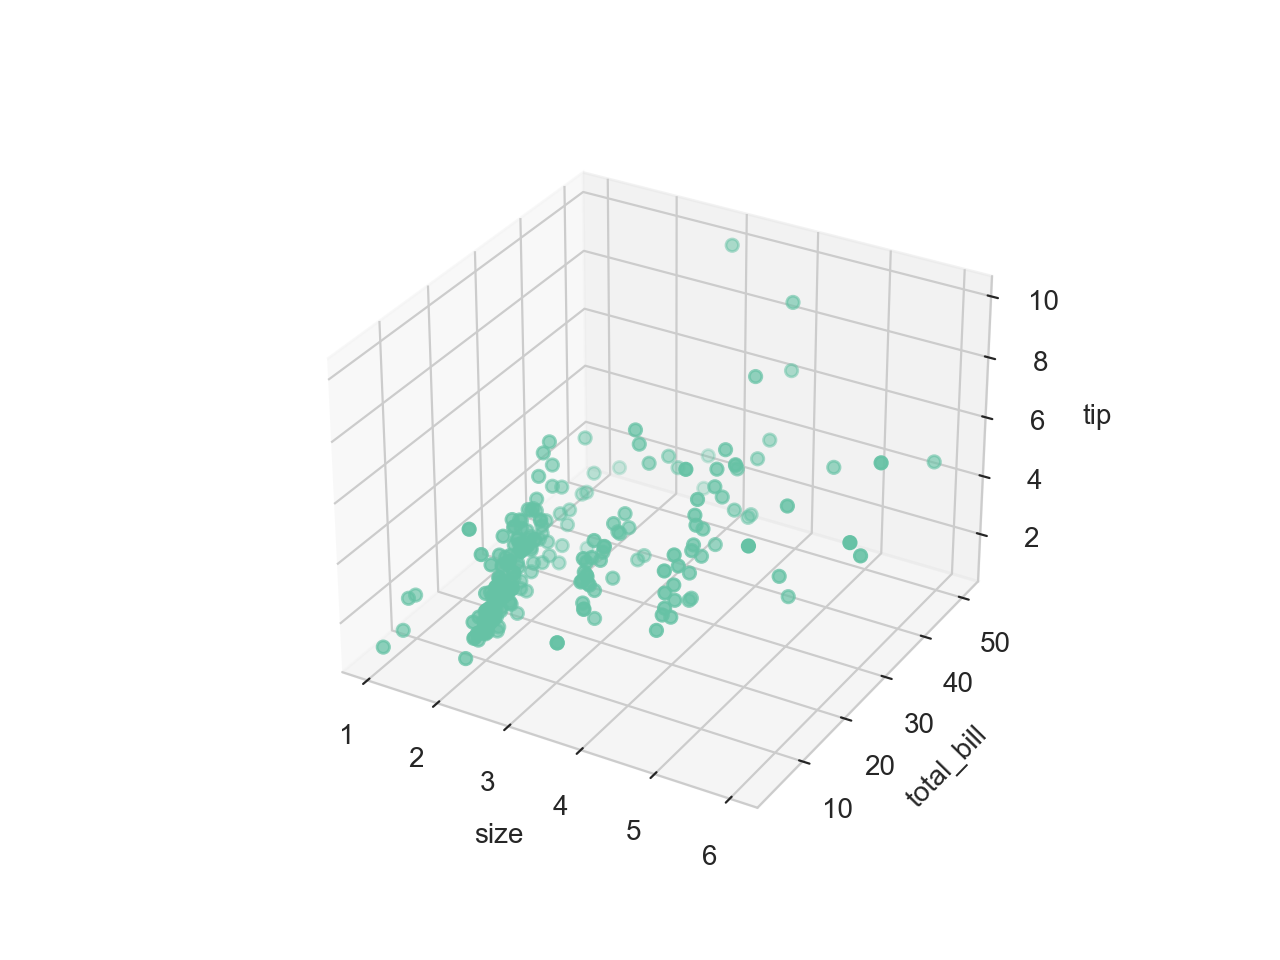

In [55]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

sns.set_style('whitegrid')  # whitegrid, white, ticks
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = tips["size"]
y = tips["total_bill"]
z = tips["tip"]
ax.scatter(x, y, z)

ax.set_xlabel("size")
ax.set_ylabel("total_bill")
ax.set_zlabel("tip")

plt.show()